In [49]:
import zipfile
import os

In [50]:
import zipfile
import pandas as pd
import os

# Define the path to the ZIP file
zip_path =zip_path = r"C:\Users\prashil\Downloads\store-sales-time-series-forecasting.zip"
  # Replace with your file path

# Extract the ZIP file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall('extracted_files')  # Extracts to a folder named 'extracted_files'

# List files to find the CSV
files = os.listdir('extracted_files')
print("Files in ZIP:", files)

# Specify the CSV file name
csv_file = 'extracted_files/train.csv'  # Replace with the actual CSV file name

# Load CSV into pandas DataFrame
df = pd.read_csv(csv_file)

# Display the DataFrame
print(df)


Files in ZIP: ['holidays_events.csv', 'oil.csv', 'sample_submission.csv', 'stores.csv', 'test.csv', 'train.csv', 'transactions.csv']
              id        date  store_nbr                      family     sales  \
0              0  2013-01-01          1                  AUTOMOTIVE     0.000   
1              1  2013-01-01          1                   BABY CARE     0.000   
2              2  2013-01-01          1                      BEAUTY     0.000   
3              3  2013-01-01          1                   BEVERAGES     0.000   
4              4  2013-01-01          1                       BOOKS     0.000   
...          ...         ...        ...                         ...       ...   
3000883  3000883  2017-08-15          9                     POULTRY   438.133   
3000884  3000884  2017-08-15          9              PREPARED FOODS   154.553   
3000885  3000885  2017-08-15          9                     PRODUCE  2419.729   
3000886  3000886  2017-08-15          9  SCHOOL AND OFFIC

In [51]:
df.head()

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


In [52]:
csv_file_train = 'extracted_files/train.csv'

In [53]:
df_train = pd.read_csv(csv_file_train)

In [54]:
df_train.isnull().sum()

id             0
date           0
store_nbr      0
family         0
sales          0
onpromotion    0
dtype: int64

In [55]:
csv_file_stores = 'extracted_files/stores.csv'
df_stores= pd.read_csv(csv_file_stores)
df_stores.isnull().sum()

store_nbr    0
city         0
state        0
type         0
cluster      0
dtype: int64

In [56]:
csv_file_holidays = 'extracted_files/holidays_events.csv'
df_holidays = pd.read_csv(csv_file_holidays)
df_holidays.rename(columns= {'type': 'holiday_type'},inplace=True)
df_holidays.isnull().sum()

date            0
holiday_type    0
locale          0
locale_name     0
description     0
transferred     0
dtype: int64

In [57]:
df_combined = pd.merge(df_train, df_stores, on='store_nbr', how='left')
print(df_combined.head())

   id        date  store_nbr      family  sales  onpromotion   city  \
0   0  2013-01-01          1  AUTOMOTIVE    0.0            0  Quito   
1   1  2013-01-01          1   BABY CARE    0.0            0  Quito   
2   2  2013-01-01          1      BEAUTY    0.0            0  Quito   
3   3  2013-01-01          1   BEVERAGES    0.0            0  Quito   
4   4  2013-01-01          1       BOOKS    0.0            0  Quito   

       state type  cluster  
0  Pichincha    D       13  
1  Pichincha    D       13  
2  Pichincha    D       13  
3  Pichincha    D       13  
4  Pichincha    D       13  


In [58]:
df_combined.head() 

,id,date,store_nbr,family,sales,onpromotion,city,state,type,cluster
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,Quito,Pichincha,D,13
1,1,2013-01-01,1,BABY CARE,0.0,0,Quito,Pichincha,D,13
2,2,2013-01-01,1,BEAUTY,0.0,0,Quito,Pichincha,D,13
3,3,2013-01-01,1,BEVERAGES,0.0,0,Quito,Pichincha,D,13
4,4,2013-01-01,1,BOOKS,0.0,0,Quito,Pichincha,D,13


In [11]:
df_combined = pd.merge(df_combined, df_holidays, on='date', how='left')

In [12]:
df_combined.head() 

,id,date,store_nbr,family,sales,onpromotion,city,state,type,cluster,holiday_type,locale,locale_name,description,transferred
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,Quito,Pichincha,D,13,Holiday,National,Ecuador,Primer dia del ano,False
1,1,2013-01-01,1,BABY CARE,0.0,0,Quito,Pichincha,D,13,Holiday,National,Ecuador,Primer dia del ano,False
2,2,2013-01-01,1,BEAUTY,0.0,0,Quito,Pichincha,D,13,Holiday,National,Ecuador,Primer dia del ano,False
3,3,2013-01-01,1,BEVERAGES,0.0,0,Quito,Pichincha,D,13,Holiday,National,Ecuador,Primer dia del ano,False
4,4,2013-01-01,1,BOOKS,0.0,0,Quito,Pichincha,D,13,Holiday,National,Ecuador,Primer dia del ano,False


In [13]:
df_combined.isnull().sum()

id                    0
date                  0
store_nbr             0
family                0
sales                 0
onpromotion           0
city                  0
state                 0
type                  0
cluster               0
holiday_type    2551824
locale          2551824
locale_name     2551824
description     2551824
transferred     2551824
dtype: int64

In [14]:
colums_to_replace = ['holiday_type','locale','locale_name','description','transferred']
df_combined[colums_to_replace] = df_combined[colums_to_replace].fillna(value='none')
print(df_combined[colums_to_replace].isnull().sum())

holiday_type    0
locale          0
locale_name     0
description     0
transferred     0
dtype: int64


In [15]:
df_combined.head()

,id,date,store_nbr,family,sales,onpromotion,city,state,type,cluster,holiday_type,locale,locale_name,description,transferred
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,Quito,Pichincha,D,13,Holiday,National,Ecuador,Primer dia del ano,False
1,1,2013-01-01,1,BABY CARE,0.0,0,Quito,Pichincha,D,13,Holiday,National,Ecuador,Primer dia del ano,False
2,2,2013-01-01,1,BEAUTY,0.0,0,Quito,Pichincha,D,13,Holiday,National,Ecuador,Primer dia del ano,False
3,3,2013-01-01,1,BEVERAGES,0.0,0,Quito,Pichincha,D,13,Holiday,National,Ecuador,Primer dia del ano,False
4,4,2013-01-01,1,BOOKS,0.0,0,Quito,Pichincha,D,13,Holiday,National,Ecuador,Primer dia del ano,False


In [16]:
import matplotlib.pyplot as plt

# scatter plote # 
A magnitude 7.8 earthquake struck Ecuador on April 16, 2016. People rallied in relief efforts donating water and other first need products which greatly affected supermarket sales for several weeks after the earthquake. so there is a spike in sales around those weeks.those spike in sale is can imbalance model accuracy therefore it can be removed to stabilzed model.

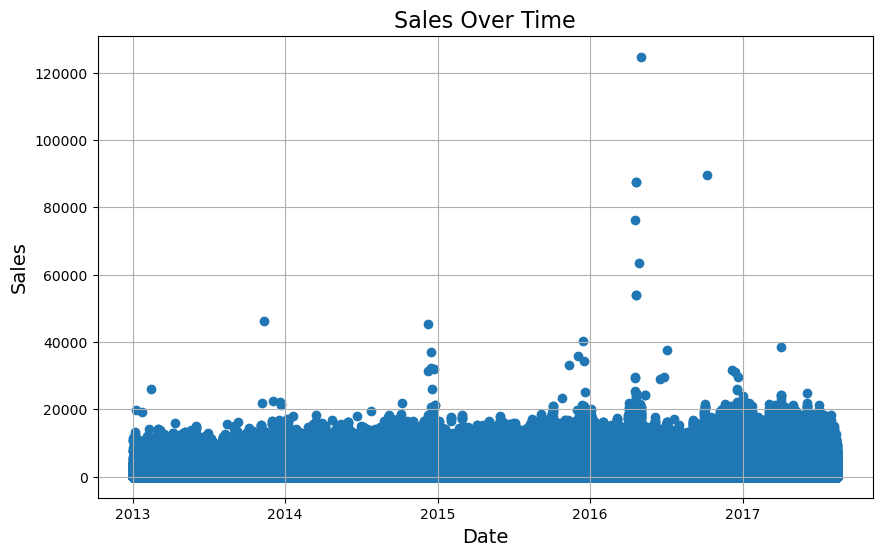

In [17]:
# Convert 'date' column to datetime
df_combined['date'] = pd.to_datetime(df_combined['date'])
dt_stats = df_combined
# Scatter Plot
plt.figure(figsize=(10, 6))
plt.scatter(df_combined['date'], df_combined['sales'])
plt.title('Sales Over Time', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Sales', fontsize=14)
plt.grid(True)
plt.show()

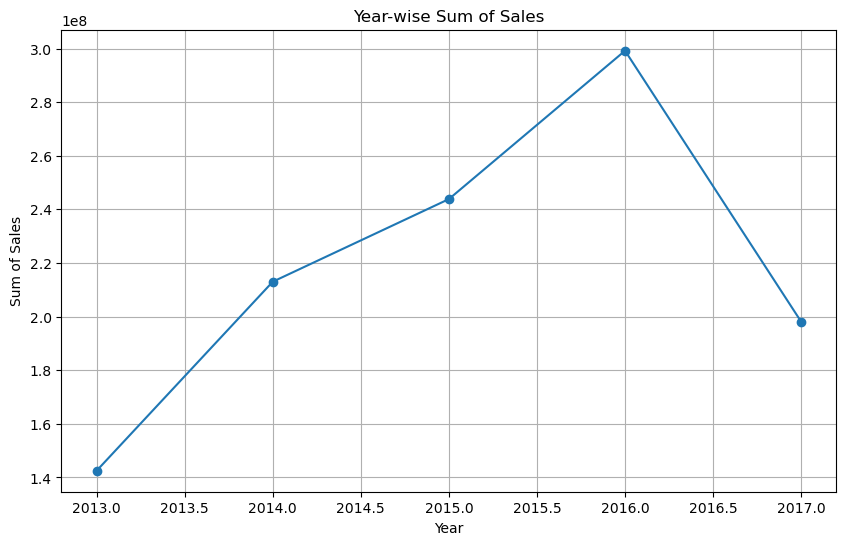

In [18]:
sales_by_year = df_combined.groupby(df_combined['date'].dt.year)['sales'].sum().reset_index()
# Plot the graph
# Plot the graph
plt.figure(figsize=(10, 6))
plt.plot(sales_by_year['date'], sales_by_year['sales'], marker='o')
plt.title('Year-wise Sum of Sales')
plt.xlabel('Year')
plt.ylabel('Sum of Sales')
plt.grid()
plt.show()


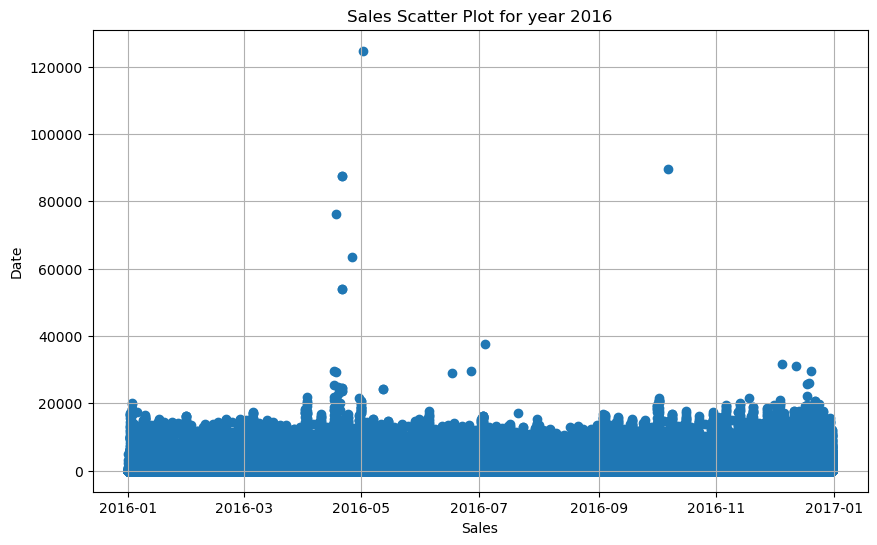

In [19]:
df_filterd = df_combined[df_combined['date'].dt.year==2016]
#scatter plot
plt.figure(figsize=(10,6))
plt.scatter(df_filterd['date'],df_filterd['sales'])
plt.title(f'Sales Scatter Plot for year {2016}')
plt.xlabel('Sales')
plt.ylabel('Date')
plt.grid()
plt.show()

In [20]:
# Group sales by year
df_grouped = df_combined.groupby(df_combined['date'].dt.year).agg(
    total_sales=('sales', 'sum'),
    first_date=('date', 'min')  # Capture the first date of each year for interactivity
).reset_index()

# Add interactive details
df_grouped['year'] = df_grouped['first_date'].dt.year
df_grouped['quarter'] = df_grouped['first_date'].dt.to_period('Q').astype(str)
df_grouped['month'] = df_grouped['first_date'].dt.month_name()
df_grouped['date'] = df_grouped['first_date']  # Keep the first date for tooltips

# Create interactive line plot
fig = px.line(
    data_frame=df_grouped,
    x='year',                   # X-axis: Year
    y='total_sales',            # Y-axis: Total Sales
    title='Interactive Sales vs Year',
    labels={'total_sales': 'Total Sales', 'year': 'Year'},
    hover_data=['year', 'quarter', 'month', 'date']  # Tooltip fields
)

# Show plot
fig.show()

NameError: name 'px' is not defined

In [ ]:
df_combined.describe()


In [ ]:
df_combined = df_combined[df_combined['sales']<=40000]

In [ ]:
df_combined.describe()

In [ ]:
# Convert 'date' column to datetime
# Scatter Plot
plt.figure(figsize=(10, 6))
plt.scatter(df_combined['date'], df_combined['sales'])
plt.title('Sales Over Time', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Sales', fontsize=14)
plt.grid(True)
plt.show()

In [ ]:
df_combined.head()

In [ ]:
import numpy as np 
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from  tensorflow.keras.layers import LSTM , Dense

In [22]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import ModelCheckpoint
from tqdm import tqdm
from tqdm.keras import TqdmCallback

# Load and preprocess the data
df_combined['date'] = pd.to_datetime(df_combined['date'])
df_combined.sort_values(by=['date'], inplace=True)

# Convert boolean columns to integers or strings
df_combined['transferred'] = df_combined['transferred'].astype(str)

# Encode categorical variables with tqdm
label_encoders = {}
for col in tqdm(['store_nbr', 'family', 'onpromotion', 'city', 'state', 'type', 'cluster', 
                 'holiday_type', 'locale', 'locale_name', 'description', 'transferred'], 
                desc="Encoding categorical variables"):
    le = LabelEncoder()
    df_combined[col] = le.fit_transform(df_combined[col])
    label_encoders[col] = le

# Scale numerical data
scaler = MinMaxScaler()
df_combined['sales'] = scaler.fit_transform(df_combined[['sales']])

# Create lagged features with tqdm
def create_lagged_feature(data, target_col, lags: int):
    df_lags = pd.DataFrame()
    for lag in tqdm(range(1, lags + 1), desc=f"Creating lagged features for {target_col}"):
        df_lags[f'{target_col}_lag{lag}'] = data[target_col].shift(lag)
    return df_lags

# Set lags and generate lagged features
lags = 10
lagged_sales = create_lagged_feature(df_combined[['sales']], 'sales', lags=lags)
df_combined = pd.concat([df_combined, lagged_sales], axis=1)
df_combined.dropna(inplace=True)

# Prepare input and output
X = df_combined[[f'sales_lag{lag}' for lag in range(1, lags + 1)]].values
y = df_combined['sales'].values

# Verify shapes before reshaping
print(f"Shape of X before reshaping: {X.shape}")
print(f"Shape of y: {y.shape}")

# Reshape X for LSTM (samples, timesteps, features)
# Ensure the reshaping dimensions align with the size of the array
X = X.reshape((X.shape[0], lags, -1))  # Use -1 to infer the last dimension

# Split into train and test
train_size = int(0.8 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Verify shapes of training and testing sets
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

# Define the LSTM model
model = Sequential([
    LSTM(50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')

# Define the checkpoint callback
checkpoint_filepath = 'model_checkpoint.h5'
checkpoint = ModelCheckpoint(
    filepath=checkpoint_filepath,
    monitor='val_loss',
    save_best_only=True,
    mode='min',
    verbose=1
)

# Train the model with tqdm for progress tracking
history = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=32,
    validation_data=(X_test, y_test),
    callbacks=[checkpoint, TqdmCallback(verbose=1)],  # Include tqdm callback for progress bar
    verbose=0  # Suppress Keras's own verbose output
)

# Evaluate and make predictions
predictions = model.predict(X_test)
predicted_sales = scaler.inverse_transform(predictions.reshape(-1, 1))

# Print the results
print("Predicted sales (first 10):", predicted_sales[:10])


Creating lagged features for sales: 100%|██████████████████████████████████████████████| 10/10 [00:00<00:00, 13.98it/s]


Shape of X before reshaping: (3054338, 10)
Shape of y: (3054338,)
Shape of X_train: (2443470, 10, 1)
Shape of X_test: (610868, 10, 1)
Shape of y_train: (2443470,)
Shape of y_test: (610868,)


0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]


Epoch 1: val_loss improved from inf to 0.00011, saving model to model_checkpoint.h5

Epoch 2: val_loss improved from 0.00011 to 0.00011, saving model to model_checkpoint.h5

Epoch 3: val_loss did not improve from 0.00011

Epoch 4: val_loss did not improve from 0.00011

Epoch 5: val_loss improved from 0.00011 to 0.00011, saving model to model_checkpoint.h5

Epoch 6: val_loss improved from 0.00011 to 0.00010, saving model to model_checkpoint.h5

Epoch 7: val_loss did not improve from 0.00010

Epoch 8: val_loss improved from 0.00010 to 0.00010, saving model to model_checkpoint.h5

Epoch 9: val_loss improved from 0.00010 to 0.00010, saving model to model_checkpoint.h5

Epoch 10: val_loss improved from 0.00010 to 0.00010, saving model to model_checkpoint.h5
19090/19090 [==============================] - 118s 6ms/step
Predicted sales (first 10): [[1756.1251 ]
 [ 808.3535 ]
 [ 109.71645]
 [ 162.82552]
 [  94.61821]
 [ 212.94778]
 [ 504.63107]
 [ 513.87317]
 [ 434.2919 ]
 [ 103.53463]]


In [47]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import ModelCheckpoint
from tqdm import tqdm
from tqdm.keras import TqdmCallback

# Load and preprocess the data
df_combined['date'] = pd.to_datetime(df_combined['date'])
df_combined.sort_values(by=['date'], inplace=True)

# Convert boolean columns to integers or strings
df_combined['transferred'] = df_combined['transferred'].astype(str)

# Encode categorical variables with tqdm
label_encoders = {}
for col in tqdm(['store_nbr', 'family', 'onpromotion', 'city', 'state', 'type', 'cluster', 
                 'holiday_type', 'locale', 'locale_name', 'description', 'transferred'], 
                desc="Encoding categorical variables"):
    le = LabelEncoder()
    df_combined[col] = le.fit_transform(df_combined[col])
    label_encoders[col] = le

# Scale numerical data
scaler = MinMaxScaler()
df_combined['sales'] = scaler.fit_transform(df_combined[['sales']])

# Create lagged features with tqdm
def create_lagged_feature(data, target_col, lags: int):
    df_lags = pd.DataFrame()
    for lag in tqdm(range(1, lags + 1), desc=f"Creating lagged features for {target_col}"):
        df_lags[f'{target_col}_lag{lag}'] = data[target_col].shift(lag)
    return df_lags

# Set lags and generate lagged features
lags = 10
lagged_sales = create_lagged_feature(df_combined[['sales']], 'sales', lags=lags)
df_combined = pd.concat([df_combined, lagged_sales], axis=1)
df_combined.dropna(inplace=True)

# Prepare input and output
'''X = df_combined[[f'sales_lag{lag}' for lag in range(1, lags + 1)]].values
y = df_combined['sales'].values

# Verify shapes before reshaping
print(f"Shape of X before reshaping: {X.shape}")
print(f"Shape of y: {y.shape}")'''

# Reshape X for LSTM (samples, timesteps, features)
# Ensure the reshaping dimensions align with the size of the array
X = X.reshape((X.shape[0], lags, -1))  # Use -1 to infer the last dimension

# Split into train and test
train_size = int(0.8 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Verify shapes of training and testing sets
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

''''# Define the LSTM model
model = Sequential([
    LSTM(50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')

# Define the checkpoint callback
checkpoint_filepath = 'model_checkpoint.h5'
checkpoint = ModelCheckpoint(
    filepath=checkpoint_filepath,
    monitor='val_loss',
    save_best_only=True,
    mode='min',
    verbose=1
)

# Train the model with tqdm for progress tracking
history = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=32,
    validation_data=(X_test, y_test),
    callbacks=[checkpoint, TqdmCallback(verbose=1)],  # Include tqdm callback for progress bar
    verbose=0  # Suppress Keras's own verbose output
)

# Evaluate and make predictions
predictions = model.predict(X_test)
predicted_sales = scaler.inverse_transform(predictions.reshape(-1, 1))

# Print the results
print("Predicted sales (first 10):", predicted_sales[:10])'''


Creating lagged features for sales: 100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:01<00:00,  9.57it/s]


Shape of X_train: (2443470, 10, 1)
Shape of X_test: (610868, 10, 1)
Shape of y_train: (2443470,)
Shape of y_test: (610868,)


'\'# Define the LSTM model\nmodel = Sequential([\n    LSTM(50, activation=\'relu\', input_shape=(X_train.shape[1], X_train.shape[2])),\n    Dense(1)\n])\nmodel.compile(optimizer=\'adam\', loss=\'mse\')\n\n# Define the checkpoint callback\ncheckpoint_filepath = \'model_checkpoint.h5\'\ncheckpoint = ModelCheckpoint(\n    filepath=checkpoint_filepath,\n    monitor=\'val_loss\',\n    save_best_only=True,\n    mode=\'min\',\n    verbose=1\n)\n\n# Train the model with tqdm for progress tracking\nhistory = model.fit(\n    X_train, y_train,\n    epochs=10,\n    batch_size=32,\n    validation_data=(X_test, y_test),\n    callbacks=[checkpoint, TqdmCallback(verbose=1)],  # Include tqdm callback for progress bar\n    verbose=0  # Suppress Keras\'s own verbose output\n)\n\n# Evaluate and make predictions\npredictions = model.predict(X_test)\npredicted_sales = scaler.inverse_transform(predictions.reshape(-1, 1))\n\n# Print the results\nprint("Predicted sales (first 10):", predicted_sales[:10])'

In [23]:
model.save('SalesForecast.h5')
loded_model = load_o

In [23]:
from tensorflow.keras.models import load_model

In [27]:
model_saved = load_model('SalesForecast.h5')
model_saved.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50)                10400     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 10,451
Trainable params: 10,451
Non-trainable params: 0
_________________________________________________________________


In [30]:
# Evaluate and make predictions
predictions = model_saved.predict(X_test)
predicted_sales = scaler.inverse_transform(predictions.reshape(-1, 1))

19090/19090 [==============================] - 120s 6ms/step


In [29]:
predicted_sales.shape

(610868, 1)

In [31]:
predicted_sales

array([[1756.1251 ],
       [ 808.3535 ],
       [ 109.71645],
       ...,
       [ 359.34955],
       [ 225.61497],
       [ 140.00494]], dtype=float32)

In [37]:
X_test.shape

(610868, 10, 1)

In [59]:
# Split point index for the test set
test_start_idx = train_size  # train_size already defined as 80% of data

# Extract data from df_combined that corresponds to X_test
df_test = df_combined.iloc[test_start_idx:]

# Display the shape of df_test and first few rows
print(f"Shape of df_test: {df_test.shape}")
print(df_test.head())


Shape of df_test: (557418, 10)
              id        date  store_nbr            family  sales  onpromotion  \
2443470  2443470  2016-10-06         19         HOME CARE  136.0           10   
2443471  2443471  2016-10-06         19        LADIESWEAR    1.0            0   
2443472  2443472  2016-10-06         19   LAWN AND GARDEN    0.0            0   
2443473  2443473  2016-10-06         19          LINGERIE   12.0            0   
2443474  2443474  2016-10-06         19  LIQUOR,WINE,BEER   16.0            0   

             city    state type  cluster  
2443470  Guaranda  Bolivar    C       15  
2443471  Guaranda  Bolivar    C       15  
2443472  Guaranda  Bolivar    C       15  
2443473  Guaranda  Bolivar    C       15  
2443474  Guaranda  Bolivar    C       15  


In [60]:
df_test.shape

(557418, 10)

In [64]:
len(df_test['sales'])

557418

In [65]:
import pandas as pd

# Convert predicted_sales to DataFrame
predicted_sales_df = pd.DataFrame(predicted_sales, columns=['predicted_sales'])

# Display the first few rows
print(predicted_sales_df.head())

# Check the shape
print(predicted_sales_df.shape)


   predicted_sales
0      1756.125122
1       808.353516
2       109.716454
3       162.825516
4        94.618210
(610868, 1)


In [67]:
predicted_sales_df,predicted_sales_df.shape

(        predicted_sales
 0           1756.125122
 1            808.353516
 2            109.716454
 3            162.825516
 4             94.618210
 ...                 ...
 610863       189.776169
 610864       342.855469
 610865       359.349548
 610866       225.614975
 610867       140.004944
 
 [610868 rows x 1 columns],
 (610868, 1))

In [68]:
df_combined
# Extract the last 610,868 rows from df_combined
df_last_rows = df_combined.tail(610868)

# Display the shape to confirm
print(f"Shape of extracted DataFrame: {df_last_rows.shape}")

# Display the first few rows of the extracted data
df_last_rows.head()

Shape of extracted DataFrame: (610868, 10)


,id,date,store_nbr,family,sales,onpromotion,city,state,type,cluster
2390020,2390020,2016-09-06,19,POULTRY,91.948,0,Guaranda,Bolivar,C,15
2390021,2390021,2016-09-06,19,PREPARED FOODS,42.000,1,Guaranda,Bolivar,C,15
2390022,2390022,2016-09-06,19,PRODUCE,576.220,69,Guaranda,Bolivar,C,15
2390023,2390023,2016-09-06,19,SCHOOL AND OFFICE SUPPLIES,15.000,5,Guaranda,Bolivar,C,15
2390024,2390024,2016-09-06,19,SEAFOOD,5.000,0,Guaranda,Bolivar,C,15


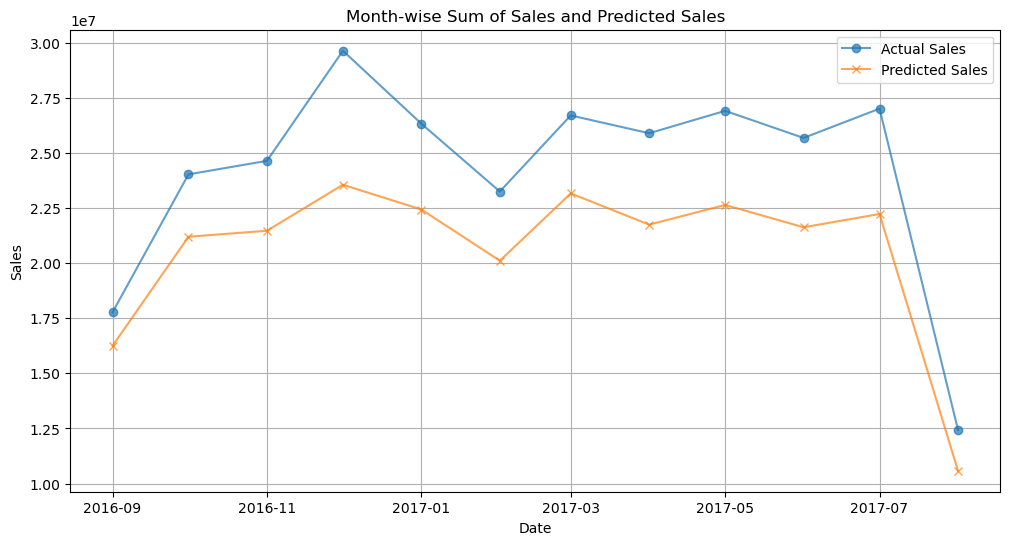

In [70]:
import pandas as pd
import matplotlib.pyplot as plt

# Merge predicted_sales_df with df_last_rows if not already merged
df_last_rows['predicted_sales'] = predicted_sales_df.values

# Convert 'date' to datetime if not already done
df_last_rows['date'] = pd.to_datetime(df_last_rows['date'])

# Extract year-month for grouping
df_last_rows['year_month'] = df_last_rows['date'].dt.to_period('M')

# Group by year-month and sum sales and predicted sales
monthly_sales = df_last_rows.groupby('year_month').agg(
    actual_sales=('sales', 'sum'),
    predicted_sales=('predicted_sales', 'sum')
).reset_index()

# Convert 'year_month' back to a datetime format for plotting
monthly_sales['year_month'] = monthly_sales['year_month'].dt.to_timestamp()

# Plot the graph
plt.figure(figsize=(12, 6))

# Plot actual sales
plt.plot(monthly_sales['year_month'], monthly_sales['actual_sales'], label='Actual Sales', alpha=0.7, marker='o')

# Plot predicted sales
plt.plot(monthly_sales['year_month'], monthly_sales['predicted_sales'], label='Predicted Sales', alpha=0.7, marker='x')

# Add title and labels
plt.title('Month-wise Sum of Sales and Predicted Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()

# Show the plot
plt.grid()
plt.show()
